In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
players_df=pd.read_excel('/content/W25530-XLS-ENG Players performance.xlsx',sheet_name='Sheet1')

In [3]:
players_df.head()

,Unnamed: 0,Unnamed: 1,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary
0,1,NaN,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.71875
1,2,NaN,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62500
2,3,NaN,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51430
3,4,NaN,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34375
4,5,NaN,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.32813


In [4]:
players_df.shape

(70, 12)

In [5]:
players_df.drop(['Unnamed: 0', 'Unnamed: 1'],axis=1,inplace=True)

In [6]:
players_df

,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary
0,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.71875
1,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62500
2,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51430
3,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34375
4,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.32813
...,...,...,...,...,...,...,...,...,...,...
65,Umesh Yadav,Kolkata Knight Riders,25,12.50,100.00,0,0,3,1,0.65625
66,Vijay Shankar,Sunrisers Hyderabad,244,20.33,126.42,0,0,11,12,0.50000
67,Virat Kohli,Royal Challengers Bangalore,464,33.14,141.46,1,2,46,13,2.65625
68,Wriddhiman Saha,Sunrisers Hyderabad,86,17.20,162.26,0,0,13,1,0.17140


In [7]:
players_df.shape

(70, 10)

In [8]:
players_df.columns

Index(['Player', 'Team', 'Runs', 'Avg', 'SR', 'Hundreds', 'Fifties', 'Fours',
       'Sixes', 'Salary '],
      dtype='object')

In [9]:
GBPI=(2*players_df['SR']+1.9*players_df['Avg']+1*players_df['Runs']+1.5*players_df['Fours']+1.75*players_df['Sixes']+20*players_df['Fifties']+25*players_df['Hundreds'])
GBPI_sal=GBPI/players_df['Salary ']
Boundaries=players_df['Fours']+players_df['Sixes']
Milestones=players_df['Fifties']+players_df['Hundreds']
IF=(players_df['Fours']+players_df['Sixes'])/players_df['Runs']
CP=players_df['Avg']*players_df['SR']/1000
FMS=(players_df['Fifties']+players_df['Hundreds'])*(players_df['Fours']+players_df['Sixes'])
HH=players_df['SR']/players_df['Sixes']

In [10]:
players_df['GBPI']=GBPI
players_df['GBPI_sal']=GBPI_sal
players_df['Boundaries']=Boundaries
players_df['Milestones']=Milestones
players_df['IF']=IF
players_df['CP']=CP
players_df['FMS']=FMS
players_df['HH']=HH

In [11]:
players_df

,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary,GBPI,GBPI_sal,Boundaries,Milestones,IF,CP,FMS,HH
0,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.71875,1025.980,596.933818,57,5,0.128959,6.806800,285,5.923077
1,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62500,859.255,1374.808000,54,2,0.137405,4.515897,108,15.321111
2,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51430,309.200,601.205522,7,0,0.114754,1.305522,0,53.505000
3,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34375,575.020,1672.785455,27,1,0.095745,2.186910,27,13.294286
4,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.32813,1244.774,937.238072,83,4,0.162745,11.604535,332,3.938654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Umesh Yadav,Kolkata Knight Riders,25,12.50,100.00,0,0,3,1,0.65625,255.000,388.571429,4,0,0.160000,1.250000,0,100.000000
66,Vijay Shankar,Sunrisers Hyderabad,244,20.33,126.42,0,0,11,12,0.50000,572.967,1145.934000,23,0,0.094262,2.570119,0,10.535000
67,Virat Kohli,Royal Challengers Bangalore,464,33.14,141.46,1,2,46,13,2.65625,966.636,363.910024,59,3,0.127155,4.687984,177,10.881538
68,Wriddhiman Saha,Sunrisers Hyderabad,86,17.20,162.26,0,0,13,1,0.17140,464.450,2709.743291,14,0,0.162791,2.790872,0,162.260000


In [12]:
players_df.loc[players_df['HH'].isnull(),'HH']=0 
players_df.loc[players_df['HH']==np.inf,'HH']=0 

In [13]:
players_df.describe()

,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary,GBPI,GBPI_sal,Boundaries,Milestones,IF,CP,FMS,HH
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,249.257143,28.579429,133.116714,0.085714,1.485714,22.400000,10.514286,0.912016,653.648629,1863.697779,32.914286,1.571429,0.127927,3.973962,88.257143,28.429354
std,168.748135,14.891400,25.182283,0.281963,1.734082,16.844902,9.571611,0.671369,283.416847,3209.163953,23.615730,1.838174,0.023289,2.397656,131.710782,31.159676
min,12.000000,3.600000,63.150000,0.000000,0.000000,1.000000,0.000000,0.028600,147.400000,110.983112,1.000000,0.000000,0.050000,0.252600,0.000000,0.000000
25%,96.500000,18.000000,120.640000,0.000000,0.000000,8.000000,4.000000,0.321663,434.057750,451.396830,12.000000,0.000000,0.113997,2.203584,0.000000,9.831071
50%,216.500000,27.070000,133.310000,0.000000,1.000000,19.000000,8.000000,0.700900,579.544000,720.480816,26.000000,1.000000,0.128680,3.712867,24.500000,15.088889
75%,395.250000,35.162500,148.472500,0.000000,3.000000,36.750000,14.000000,1.328130,852.283500,1727.214864,54.000000,3.000000,0.142857,4.954559,132.250000,33.768750
max,692.000000,83.200000,204.810000,1.000000,8.000000,64.000000,52.000000,2.656250,1418.450000,18496.853147,83.000000,9.000000,0.181818,11.604535,702.000000,162.260000


In [14]:
columns=list(players_df.columns)[2:18]
milestones=['Fifties','Hundreds','Milestones','FMS']
for e in milestones:
  columns.remove(e)
columns

['Runs',
 'Avg',
 'SR',
 'Fours',
 'Sixes',
 'Salary ',
 'GBPI',
 'GBPI_sal',
 'Boundaries',
 'IF',
 'CP',
 'HH']

In [15]:
for col in columns:
  players_df[col+'_Cat']=pd.cut(players_df[col],
  bins=[0,players_df[col].quantile(0.25),players_df[col].quantile(0.5),players_df[col].quantile(0.75),players_df[col].max()],
  labels=['Class D','Class C','Class B','Class A'],duplicates='drop')

In [16]:
players_df['Fifties_Cat']=pd.cut(players_df['Fifties'],bins=[0,1,3,8],labels=['Class C','Class B','Class A'])
players_df['Hundreds_Cat']=players_df['Hundreds'].apply(lambda x: 'Hundred' if x==1 else 'No Hundred')
players_df['Milestones_Cat']=pd.cut(players_df['Milestones'],bins=[0,1,3,9],labels=['Class C','Class B','Class A'])
players_df['FMS_Cat']=pd.cut(players_df['FMS'],bins=[0,24,132,702],labels=['Class C','Class B','Class A'])

In [17]:
#players_df.loc[players_df.isnull().sum()>0,['Sixes_Cat','Fifties_Cat','HH_Cat','Milestones_Cat','FMS_Cat']
players_df.loc[players_df['Sixes_Cat'].isnull(),'Sixes_Cat']='Class D'
players_df.loc[players_df['Fifties_Cat'].isnull(),'Fifties_Cat']='Class C'
players_df.loc[players_df['HH_Cat'].isnull(),'HH_Cat']='Class D'
players_df.loc[players_df['Milestones_Cat'].isnull(),'Milestones_Cat']='Class C'
players_df.loc[players_df['FMS_Cat'].isnull(),'FMS_Cat']='Class C'

In [18]:
players_df.isnull().sum()

Player            0
Team              0
Runs              0
Avg               0
SR                0
Hundreds          0
Fifties           0
Fours             0
Sixes             0
Salary            0
GBPI              0
GBPI_sal          0
Boundaries        0
Milestones        0
IF                0
CP                0
FMS               0
HH                0
Runs_Cat          0
Avg_Cat           0
SR_Cat            0
Fours_Cat         0
Sixes_Cat         0
Salary _Cat       0
GBPI_Cat          0
GBPI_sal_Cat      0
Boundaries_Cat    0
IF_Cat            0
CP_Cat            0
HH_Cat            0
Fifties_Cat       0
Hundreds_Cat      0
Milestones_Cat    0
FMS_Cat           0
dtype: int64

In [183]:
fig=px.scatter(players_df,x='Runs',y='Salary ',facet_row='Avg_Cat',facet_col='SR_Cat',color='Salary _Cat',symbol='IF_Cat',hover_data=['Player','Team','Avg','SR','Boundaries','Milestones'],
               labels={'SR_Cat': 'SR','Avg_Cat':'AVG','Salary _Cat':'Salary','IF_Cat':'IF'},
               title="Best Performing Players based on Average,Strike Rate,Salary and Impact Factor")
#fig.update_traces(textfont_size=5)
fig.update_layout(width=800,height=700,autosize=False)
fig.show()

In [185]:
px.scatter(players_df,x='Runs',y='Salary ',facet_row='Avg_Cat',facet_col='SR_Cat',color='GBPI_sal_Cat',symbol='IF_Cat',hover_data=['Player','Team','Avg','SR','Boundaries','Milestones'],
           labels={'SR_Cat': 'SR','Avg_Cat':'AVG','GBPI_sal_Cat':'GBPI on Salary','IF_Cat':'IF'},
               title="Best Performing Players based on Average,Strike Rate,General Batting Performance Index and Impact Factor")

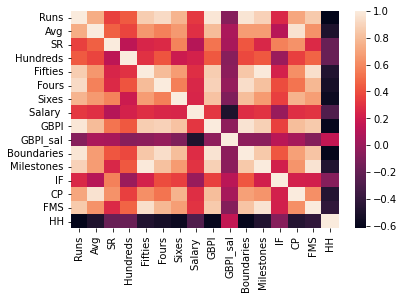

In [21]:
sns.heatmap(players_df.corr())

In [22]:
players_df_corr=players_df.corr()
corr_df=players_df_corr.loc[(players_df_corr['Salary ']>0.25) | (players_df_corr['Salary ']<-0.25),['Salary ']]

In [23]:
#players_df.corr()
players_df_corr.loc[(players_df_corr['Salary ']>0.25) | (players_df_corr['Salary ']<-0.25),['Salary ']]

,Salary
Runs,0.323430
Avg,0.291995
Fifties,0.290052
Fours,0.255032
Salary,1.000000
GBPI,0.319098
GBPI_sal,-0.492559
Boundaries,0.281944
Milestones,0.309390
CP,0.289006


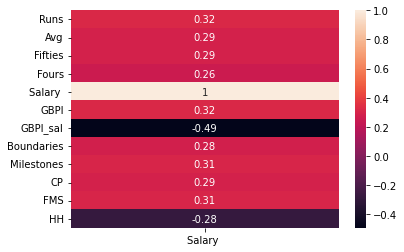

In [24]:
sns.heatmap(corr_df,annot=True)

In [25]:
players_df[['SR','Salary ']].corr()

,SR,Salary
SR,1.000000,0.105567
Salary,0.105567,1.000000


In [165]:
players_df[['Avg','Salary ']].corr()

,Avg,Salary
Avg,1.000000,0.291995
Salary,0.291995,1.000000


In [26]:
players_df[['Avg','SR']].corr()

,Avg,SR
Avg,1.000000,0.458721
SR,0.458721,1.000000


In [27]:
players_df[['Avg','Sixes']].corr()

,Avg,Sixes
Avg,1.000000,0.659493
Sixes,0.659493,1.000000


In [187]:
px.bar(players_df,x='Team',y='Runs',color='Runs_Cat',barmode='group',hover_data=['Player','Avg','SR','Milestones','GBPI'],text='Player',
       labels={'Runs_Cat':'Runs Class'},
               title="Distribution of Runs per Team")

In [196]:
px.box(players_df,x='Team',y='GBPI', 
               title="Box Plot of General Batting Performance Index per Team",hover_data=['Player','Team'])


In [34]:
corr_df.columns

Index(['Salary '], dtype='object')

In [35]:
normal_players_df=players_df[list(corr_df.index)]
normal_players_df_target=players_df['Salary ']
normal_players_df.drop(['Salary '],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
normal_players_df.head()

,Runs,Avg,Fifties,Fours,GBPI,GBPI_sal,Boundaries,Milestones,CP,FMS,HH
0,442,44.20,5,31,1025.980,596.933818,57,5,6.806800,285,5.923077
1,393,32.75,1,45,859.255,1374.808000,54,2,4.515897,108,15.321111
2,61,12.20,0,5,309.200,601.205522,7,0,1.305522,0,53.505000
3,282,23.50,1,20,575.020,1672.785455,27,1,2.186910,27,13.294286
4,510,56.66,4,31,1244.774,937.238072,83,4,11.604535,332,3.938654


In [37]:
normal_players_df_target.head()

0    1.71875
1    0.62500
2    0.51430
3    0.34375
4    1.32813
Name: Salary , dtype: float64

In [38]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
cols=normal_players_df.columns
normal_players_df = scaler.fit_transform(normal_players_df)
scaled_normal_players_df = pd.DataFrame(normal_players_df, columns=cols)
scaled_normal_players_df.head()

,Runs,Avg,Fifties,Fours,GBPI,GBPI_sal,Boundaries,Milestones,CP,FMS,HH
0,0.632353,0.510050,0.625,0.476190,0.691224,0.026431,0.682927,0.555556,0.577364,0.405983,0.036504
1,0.560294,0.366206,0.125,0.698413,0.560053,0.068739,0.646341,0.222222,0.375557,0.153846,0.094423
2,0.072059,0.108040,0.000,0.063492,0.127296,0.026663,0.073171,0.000000,0.092753,0.000000,0.329749
3,0.397059,0.250000,0.125,0.301587,0.336431,0.084946,0.317073,0.111111,0.170395,0.038462,0.081932
4,0.732353,0.666583,0.500,0.476190,0.863360,0.044940,1.000000,0.444444,1.000000,0.472934,0.024274


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [108]:
#x_train, x_test, y_train, y_test = train_test_split(scaled_normal_players_df, normal_players_df_target, test_size=0.3,random_state=21)
x_train, x_test, y_train, y_test = train_test_split(scaled_normal_players_df, normal_players_df_target, test_size=0.3,random_state=21)

In [109]:
model= RandomForestRegressor(max_depth =27, random_state =21,n_estimators=38,criterion='squared_error')
#model=RandomForestRegressor()

In [110]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=27, n_estimators=38, random_state=21)

In [111]:
predictions=model.predict(x_test)

In [112]:
mse = np.mean((predictions - y_test)**2)
score=model.score(x_test,y_test)
print("MSE: ",mse)
print("Score: ",score)

MSE:  0.027232706578657166
Score:  0.9012908231739506


In [114]:
from sklearn.preprocessing import LabelEncoder

In [116]:
encoder=LabelEncoder()
players_df['Salary_Encoded']=encoder.fit_transform(players_df['Salary _Cat'])

In [117]:
players_df['Salary_Encoded']

0     0
1     2
2     2
3     2
4     1
     ..
65    2
66    2
67    0
68    3
69    3
Name: Salary_Encoded, Length: 70, dtype: int64

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
x_train, x_test, y_train, y_test = train_test_split(players_df.iloc[:,2:17], players_df['Salary_Encoded'], test_size=0.3,random_state=21)

In [163]:
model=RandomForestClassifier(max_depth =27, random_state =21,n_estimators=38,criterion='entropy')

In [164]:
model.fit(x_train,y_train)
predictions=model.predict(x_test)
score=model.score(x_test,y_test)
print(score)

0.7619047619047619


In [212]:
px.bar(players_df,x='Team',y='Runs',color='Salary _Cat',barmode='group',hover_data=['Player','Avg','SR','Milestones','GBPI'],text='Player',
        labels={'Salary _Cat':'Salary Class'},
               title="Distribution of Runs per per Team and differed by Salary Classes")

In [182]:
px.scatter(players_df,x='Salary ',y='Milestones',facet_col='GBPI_Cat',color='Team',hover_data=['Player','SR','Avg','GBPI_sal'],
           labels={'GBPI_Cat':'GBPI'},
           title='Milestones vs Salary (in Million $) divided by General Batting Performance Index')

In [178]:
px.scatter(players_df,x='Boundaries',y='Salary ',color='Team',hover_data=['Player','SR','Avg','GBPI_sal'],trendline="ols", trendline_scope="overall",
           labels={'Salary:Salary (in Million $)'},
           title='Boundaries vs Salary (in Million $) by team')

In [28]:
px.scatter(players_df, x="Avg", y="SR", size="Salary ", color='Team', hover_name="Player",
           labels={'Avg':'Average Runs Per Wicket','SR':'Strike Rate (Runs per 100 balls)'},
           title='Average vs Strike Rate of Batters With Salary(in Million $) Denoted by Bubble Size')

In [189]:
px.bar(players_df,x='Team',y='GBPI',color='GBPI_Cat',barmode='group',hover_data=['Player','Avg','SR','Milestones','GBPI'],text='Player', 
       labels={'GBPI_Cat':'GBPI Class'},
               title="Distribution of General Batting Performance Index per Team")

In [238]:
fig=px.pie(players_df,values='FMS',names='Player',title='Fast Milestone Scoring for each player')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [239]:
px.scatter(players_df,x='Boundaries',y='SR',size="Salary ", color='Avg_Cat', hover_name="Player",labels={'SR':'Strike Rate (Runs per 100 balls)'},
           title='Sixes vs Strike Rate of Batters With Salary(in Million $) Denoted by Bubble Size')

In [243]:
fig=px.pie(players_df,names='Team',values='GBPI_sal',title='Finding the concentration of underpaid and overpaid players based on General Batting Performance Index Per Salary')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()